# Machine Learning - Brazilian E-Commerce Public Dataset by Olist

Topik: Analisis Performa E-Commerce Olist


##Menentukan pertanyaan bisnis
*   Produk mana yang paling laris dan memberikan revenue tertinggi?
*   Bagaimana keterlambatan pengiriman mempengaruhi kepuasan pelanggan?
*   Metode pembayaran mana yang paling populer dan menghasilkan transaksi terbesar?
*   Seller mana yang paling cepat mengirim dan paling banyak ordernya?
*   Apakah jumlah produk dalam satu order memengaruhi total pembayaran atau total harga, dan bagaimana kontribusi ongkos kirim terhadap total pembayaran?





## Data Loading

In [1]:
!pip install -q kaggle

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
! mkdir ~/.kaggle

In [4]:
!cp /content/drive/MyDrive/peuu/kaggle.json ~/.kaggle/kaggle.json

In [5]:
! chmod 600 ~/.kaggle/kaggle.json

In [6]:
! kaggle datasets download olistbr/brazilian-ecommerce

Dataset URL: https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce
License(s): CC-BY-NC-SA-4.0
  0% 0.00/42.6M [00:00<?, ?B/s]
100% 42.6M/42.6M [00:00<00:00, 1.26GB/s]


In [7]:
!unzip /content/brazilian-ecommerce.zip

Archive:  /content/brazilian-ecommerce.zip
  inflating: olist_customers_dataset.csv  
  inflating: olist_geolocation_dataset.csv  
  inflating: olist_order_items_dataset.csv  
  inflating: olist_order_payments_dataset.csv  
  inflating: olist_order_reviews_dataset.csv  
  inflating: olist_orders_dataset.csv  
  inflating: olist_products_dataset.csv  
  inflating: olist_sellers_dataset.csv  
  inflating: product_category_name_translation.csv  


####Import Library

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.preprocessing import LabelEncoder # For data Encoding

##Data Wrangling

###Gathering Data

####Load Dataframe

In [3]:
df_customer = pd.read_csv('/content/olist_customers_dataset.csv')
df_geolocation = pd.read_csv('/content/olist_geolocation_dataset.csv')
df_orders_items = pd.read_csv('/content/olist_order_items_dataset.csv')
df_payments = pd.read_csv('/content/olist_order_payments_dataset.csv')
df_review = pd.read_csv('/content/olist_order_reviews_dataset.csv')
df_orders = pd.read_csv('/content/olist_orders_dataset.csv')
df_product = pd.read_csv('/content/olist_products_dataset.csv')
df_sellers = pd.read_csv('/content/olist_sellers_dataset.csv')
df_category = pd.read_csv('/content/product_category_name_translation.csv')

####Load masing-masing dataframe untuk dianalisis dataframe apa saja yang akan dilakukan agregasi atau tidak pada saat melakukan merge

In [4]:
df_customer.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [5]:
df_review.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [6]:
df_payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [7]:
df_category.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [8]:
df_orders_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [9]:
df_sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


####Merge All of Dataframe

In [10]:
df = df_orders.copy()

In [11]:
review_agg = (
    df_review
    .groupby('order_id', as_index=False)
    .agg({
        'review_score': 'mean'
    })
)


df = df.merge(review_agg, on='order_id', how='left')

In [12]:
# 1. total pembayaran per order
total_payment = (
    df_payments
    .groupby('order_id')['payment_value']
    .sum()
    .reset_index(name='total_payment')
)

# 2. jumlah cicilan maksimum
installments = (
    df_payments
    .groupby('order_id')['payment_installments']
    .max()
    .reset_index(name='payment_installments')
)

# 3. ambil payment_type pertama (bukan paling sering)
payment_type = (
    df_payments
    .groupby('order_id')['payment_type']
    .first()
    .reset_index(name='payment_type')
)

# 4. gabungkan hasil agregasi
payments_agg = (
    total_payment
    .merge(installments, on='order_id')
    .merge(payment_type, on='order_id')
)

# 5. merge ke df utama
df = df.merge(payments_agg, on='order_id', how='left')


In [13]:
category = (
    df_product
    .merge(df_category, on='product_category_name', how='left')
    .drop(columns=['product_category_name'])
    .rename(columns={'product_category_name_english': 'product_category'})
)

In [40]:
df = df.merge(
    df_customer[["customer_id", "customer_state", "customer_city"]],
    on="customer_id",
    how="left"
)

In [14]:
items_full = df_orders_items.merge(
    category,   # berisi product_id & product_category
    on='product_id',
    how='left'
)

total_price = (
    items_full
    .groupby('order_id')['price']
    .sum()
    .reset_index(name='total_price')
)

total_freight = (
    items_full
    .groupby('order_id')['freight_value']
    .sum()
    .reset_index(name='total_freight')
)

num_products = (
    items_full
    .groupby('order_id')['product_id']
    .nunique()
    .reset_index(name='num_products')
)

product_category = (
    items_full
    .groupby('order_id')['product_category']
    .first()
    .reset_index(name='product_category')
)

items_agg = (
    total_price
    .merge(total_freight, on='order_id')
    .merge(num_products, on='order_id')
    .merge(product_category, on='order_id')
)

df = df.merge(items_agg, on='order_id', how='left')

In [15]:
seller_agg = (
    df_orders_items
    .merge(df_sellers[['seller_id', 'seller_state']], on='seller_id', how='left')
    .groupby('order_id', as_index=False)
    .agg(
        seller_state=('seller_state', 'first')
    )
)

df = df.merge(seller_agg, on='order_id', how='left')

###Data Assesment

####Assesing Data

In [16]:
df.shape

(99441, 17)

In [46]:
df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_score,total_payment,payment_installments,payment_type,total_price,total_freight,num_products,product_category,seller_state,customer_state,customer_city
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,4.0,38.71,1.0,credit_card,29.99,8.72,1.0,housewares,SP,SP,sao paulo
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,4.0,141.46,1.0,boleto,118.70,22.76,1.0,perfumery,SP,BA,barreiras
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,5.0,179.12,3.0,credit_card,159.90,19.22,1.0,auto,SP,GO,vianopolis
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,5.0,72.20,1.0,credit_card,45.00,27.20,1.0,pet_shop,MG,RN,sao goncalo do amarante
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,5.0,28.62,1.0,credit_card,19.90,8.72,1.0,stationery,SP,SP,santo andre


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_id                       99441 non-null  object 
 1   customer_id                    99441 non-null  object 
 2   order_status                   99441 non-null  object 
 3   order_purchase_timestamp       99441 non-null  object 
 4   order_approved_at              99281 non-null  object 
 5   order_delivered_carrier_date   97658 non-null  object 
 6   order_delivered_customer_date  96476 non-null  object 
 7   order_estimated_delivery_date  99441 non-null  object 
 8   review_score                   98673 non-null  float64
 9   total_payment                  99440 non-null  float64
 10  payment_installments           99440 non-null  float64
 11  payment_type                   99440 non-null  object 
 12  total_price                    98666 non-null 

dari data terlihat point 3, 5, 6, dan 7 ngga bertipe 'datetime' dan tentunya akan diubah nantinya ~~



In [19]:
df.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,160
order_delivered_carrier_date,1783
order_delivered_customer_date,2965
order_estimated_delivery_date,0
review_score,768
total_payment,1


dan disini juga terlihat banyak sekali null, nantinya akan dianalisis lagi untuk cara terbaik yang akan digunakan kalo misal ada null~~

In [20]:
df.describe()

,review_score,total_payment,payment_installments,total_price,total_freight,num_products
count,98673.000000,99440.000000,99440.000000,98666.000000,98666.000000,98666.000000
mean,4.086793,160.990267,2.930521,137.754076,22.823562,1.038098
std,1.346274,221.951257,2.715685,210.645145,21.650909,0.226456
min,1.000000,0.000000,0.000000,0.850000,0.000000,1.000000
25%,4.000000,62.010000,1.000000,45.900000,13.850000,1.000000
50%,5.000000,105.290000,2.000000,86.900000,17.170000,1.000000
75%,5.000000,176.970000,4.000000,149.900000,24.040000,1.000000
max,5.000000,13664.080000,24.000000,13440.000000,1794.960000,8.000000


Distribusi variabel numerik menunjukkan pola right-skewed yang umum pada data transaksi e-commerce. Nilai ekstrem pada total pembayaran dan ongkos kirim menunjukkan adanya outlier yang valid secara bisnis. Nilai minimum nol pada total pembayaran dan cicilan mengindikasikan adanya pesanan yang dibatalkan atau tidak diproses pembayaran, sehingga perlu dipertimbangkan pada tahap data cleaning dan pemodelan.

In [21]:
print("Data Duplikat : ",df.duplicated().sum())

Data Duplikat :  0


####Analysis Column with Visualization
Digunakan karena mau liat persebaran menggunakan visualisasi dari masing-masing columnnya

######order_id


In [22]:
# Frequency Analysis
print(df['order_id'].value_counts())

order_id
66dea50a8b16d9b4dee7af250b4be1a5    1
e481f51cbdc54678b7cc49136f2d6af7    1
53cdb2fc8bc7dce0b6741e2150273451    1
47770eb9100c2d0c44946d9cf07ec65d    1
949d5b44dbf5de918fe9c16f97b45f8a    1
                                   ..
203096f03d82e0dffbc41ebc2e2bcfb7    1
f848643eec1d69395095eb3840d2051e    1
2807d0e504d6d4894d41672727bc139f    1
95266dbfb7e20354baba07964dac78d5    1
f3e7c359154d965827355f39d6b1fdac    1
Name: count, Length: 99441, dtype: int64


######customer_id

In [24]:
print(df['customer_id'].value_counts())

customer_id
edb027a75a1449115f6b43211ae02a24    1
9ef432eb6251297304e76186b10a928d    1
b0830fb4747a6c6d20dea0b8c802d7ef    1
41ce2a54c0b03bf3443c3d931a367089    1
f88197465ea7920adcdbec7375364d82    1
                                   ..
d2b091571da224a1b36412c18bc3bbfe    1
4fa1cd166fa598be6de80fa84eaade43    1
72ae281627a6102d9b3718528b420f8a    1
a166da34890074091a942054b36e4265    1
62b423aab58096ca514ba6aa06be2f98    1
Name: count, Length: 99441, dtype: int64


######order_status

In [26]:
print(df['order_status'].value_counts())

order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: count, dtype: int64


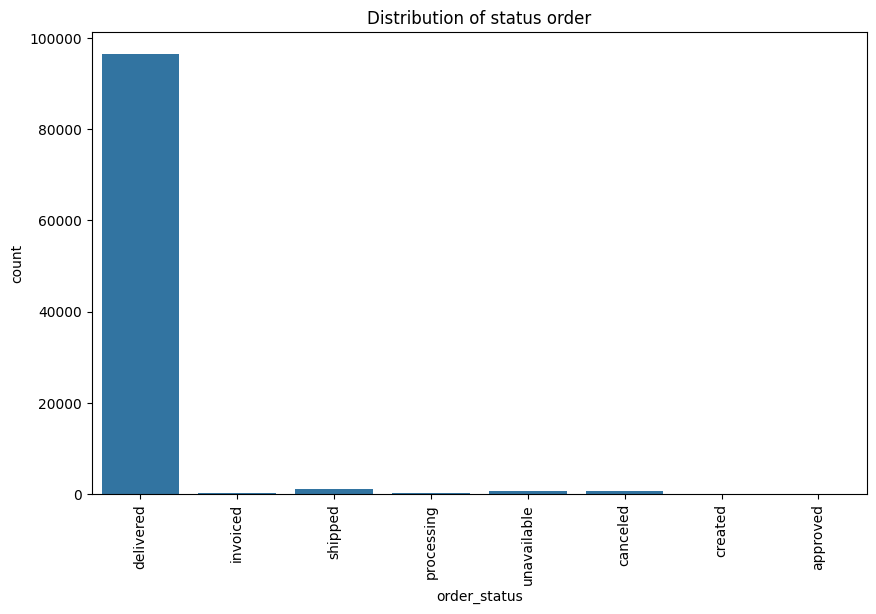

In [27]:
plt.figure(figsize=(10, 6))
sns.countplot(x='order_status', data=df)
plt.title('Distribution of status order')
plt.xticks(rotation=90)
plt.show()

######order_purchase_timestamp

belum datetime

In [28]:
print(df['order_purchase_timestamp'].value_counts())

order_purchase_timestamp
2018-02-19 15:37:47    3
2018-08-02 12:05:26    3
2018-04-11 10:48:14    3
2018-03-31 15:08:21    3
2018-08-02 12:06:09    3
                      ..
2017-07-12 13:42:13    1
2018-03-31 14:24:53    1
2018-01-09 12:21:52    1
2017-11-13 09:43:20    1
2017-11-16 16:19:50    1
Name: count, Length: 98875, dtype: int64


######order_approved_at

ada nilai null dan belum datetime

In [29]:
print(df['order_approved_at'].value_counts())

order_approved_at
2018-02-27 04:31:10    9
2018-07-05 16:33:01    7
2017-11-07 07:30:29    7
2018-01-10 10:32:03    7
2018-02-06 05:31:52    7
                      ..
2018-01-25 15:09:37    1
2017-06-02 20:05:13    1
2017-02-18 17:42:35    1
2018-01-15 18:51:45    1
2018-01-09 09:32:26    1
Name: count, Length: 90733, dtype: int64


######order_delivered_customer_date

banyak nilai null dan belum datetime

In [30]:
print(df['order_delivered_customer_date'].value_counts())

order_delivered_customer_date
2016-10-27 17:32:07    3
2018-05-14 20:02:44    3
2018-05-08 19:36:48    3
2018-02-14 21:09:19    3
2017-12-02 00:26:45    3
                      ..
2018-01-09 21:42:59    1
2018-06-19 17:02:46    1
2018-08-27 21:08:47    1
2018-08-22 23:31:46    1
2017-03-04 08:32:46    1
Name: count, Length: 95664, dtype: int64


######order_delivered_carrier_date

banyak nilai null dan belum datetime

In [31]:
print(df['order_delivered_carrier_date'].value_counts())

order_delivered_carrier_date
2018-05-09 15:48:00    47
2018-05-10 18:29:00    32
2018-05-07 12:31:00    21
2018-05-02 15:15:00    16
2018-07-24 16:07:00    16
                       ..
2017-03-03 13:51:35     1
2018-01-31 23:06:09     1
2018-03-09 19:38:48     1
2018-03-28 22:34:32     1
2017-10-10 19:52:54     1
Name: count, Length: 81018, dtype: int64


######order_estimated_delivery_date

belum datetime

In [32]:
print(df['order_estimated_delivery_date'].value_counts())

order_estimated_delivery_date
2017-12-20 00:00:00    522
2018-03-12 00:00:00    516
2018-03-13 00:00:00    513
2018-05-29 00:00:00    513
2018-02-14 00:00:00    507
                      ... 
2018-10-11 00:00:00      1
2016-12-30 00:00:00      1
2017-01-19 00:00:00      1
2016-10-24 00:00:00      1
2016-10-27 00:00:00      1
Name: count, Length: 459, dtype: int64


######customer_state

In [47]:
print(df['customer_state'].value_counts())

customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: count, dtype: int64


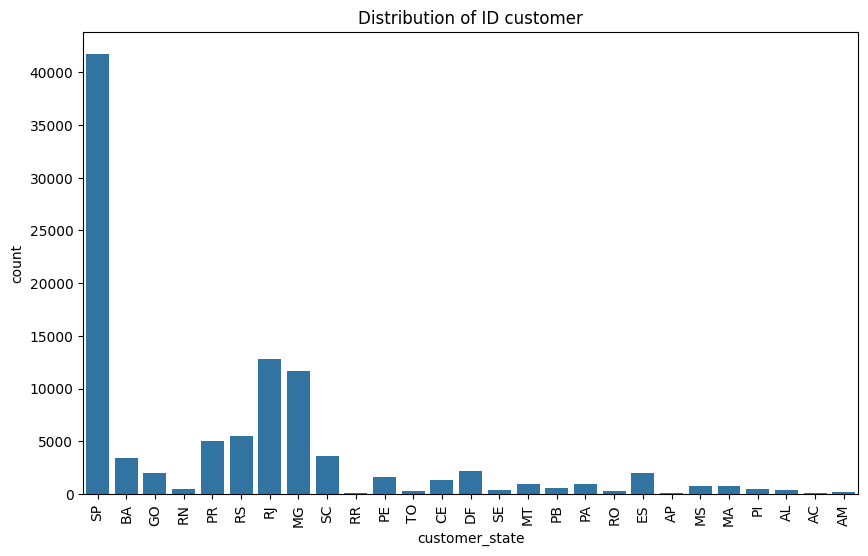

In [48]:
plt.figure(figsize=(10, 6))
sns.countplot(x='customer_state', data=df)
plt.title('Distribution of ID customer')
plt.xticks(rotation=90)
plt.show()

######customer_city

In [49]:
print(df['customer_city'].value_counts())

customer_city
sao paulo         15540
rio de janeiro     6882
belo horizonte     2773
brasilia           2131
curitiba           1521
                  ...  
angicos               1
morro da garca        1
varzea do poco        1
mamonas               1
itupiranga            1
Name: count, Length: 4119, dtype: int64


######total_payment

In [51]:
print(df['total_payment'].value_counts())

total_payment
77.57     254
35.00     169
73.34     163
116.94    132
56.78     124
         ... 
167.98      1
287.12      1
42.14       1
233.29      1
328.49      1
Name: count, Length: 27979, dtype: int64


######payment_installments

In [52]:
print(df['payment_installments'].value_counts())

payment_installments
1.0     48268
2.0     12363
3.0     10429
4.0      7070
10.0     5315
5.0      5227
8.0      4251
6.0      3908
7.0      1622
9.0       644
12.0      133
15.0       74
18.0       27
11.0       23
24.0       18
20.0       17
13.0       16
14.0       15
17.0        8
16.0        5
21.0        3
0.0         2
23.0        1
22.0        1
Name: count, dtype: int64


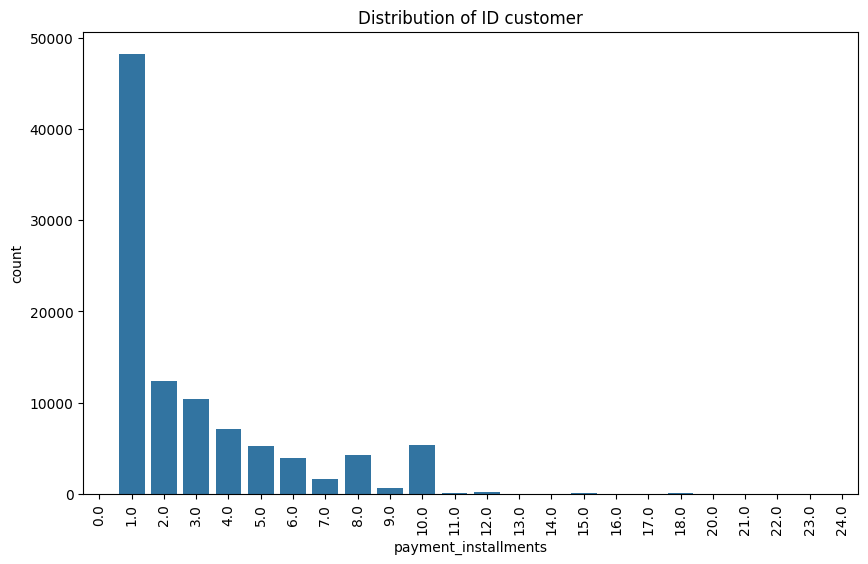

In [53]:
plt.figure(figsize=(10, 6))
sns.countplot(x='payment_installments', data=df)
plt.title('Distribution of ID customer')
plt.xticks(rotation=90)
plt.show()

######payment_type

not_defined

In [54]:
print(df['payment_type'].value_counts())

payment_type
credit_card    75387
boleto         19784
voucher         2739
debit_card      1527
not_defined        3
Name: count, dtype: int64


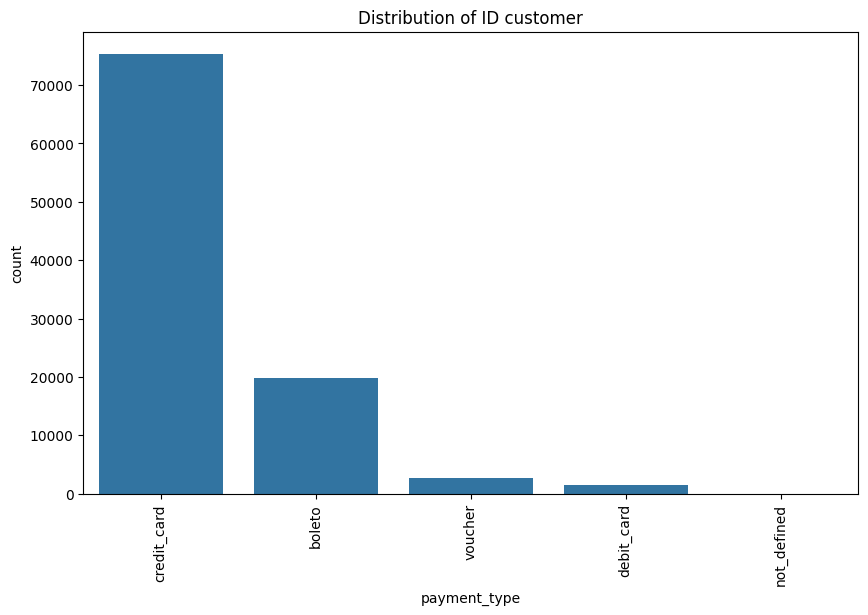

In [55]:
plt.figure(figsize=(10, 6))
sns.countplot(x='payment_type', data=df)
plt.title('Distribution of ID customer')
plt.xticks(rotation=90)
plt.show()

######total_price

banyak null

In [56]:
print(df['total_price'].value_counts())

total_price
59.90     1723
69.90     1605
49.90     1420
89.90     1248
99.90     1191
          ... 
239.59       1
97.29        1
338.52       1
68.75        1
579.70       1
Name: count, Length: 7761, dtype: int64


######total_freight

banyak null

In [57]:
print(df['total_freight'].value_counts())

total_freight
15.10     2952
7.78      1839
14.10     1529
11.85     1444
18.23     1219
          ... 
110.03       1
131.18       1
91.24        1
80.50        1
62.56        1
Name: count, Length: 7970, dtype: int64


######num_products

banyak null

In [58]:
print(df['num_products'].value_counts())

num_products
1.0    95430
2.0     2846
3.0      298
4.0       70
6.0       10
5.0        8
7.0        3
8.0        1
Name: count, dtype: int64


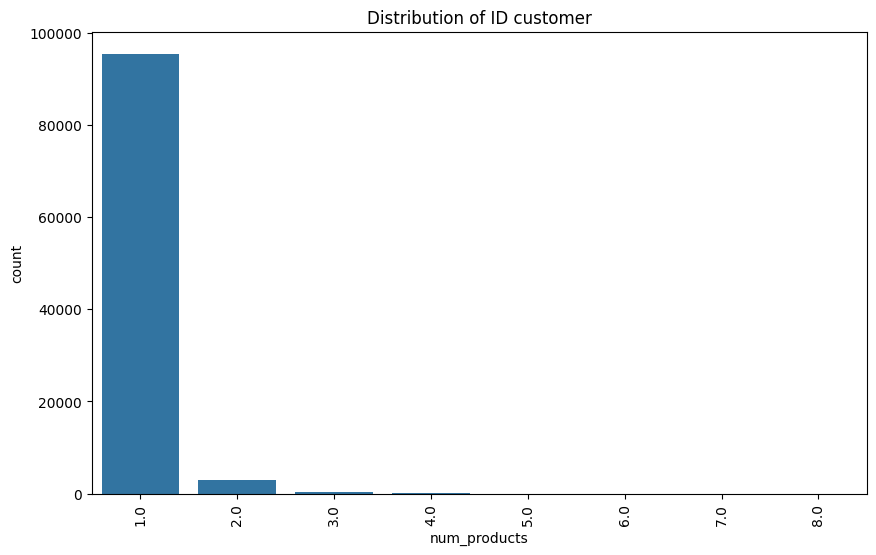

In [61]:
plt.figure(figsize=(10, 6))
sns.countplot(x='num_products', data=df)
plt.title('Distribution of num product')
plt.xticks(rotation=90)
plt.show()

######product_category

banyak null

In [62]:
print(df['product_category'].value_counts())

product_category
bed_bath_table               9315
health_beauty                8796
sports_leisure               7683
computers_accessories        6661
furniture_decor              6355
                             ... 
home_comfort_2                 22
cds_dvds_musicals              12
la_cuisine                     12
fashion_childrens_clothes       8
security_and_services           2
Name: count, Length: 71, dtype: int64


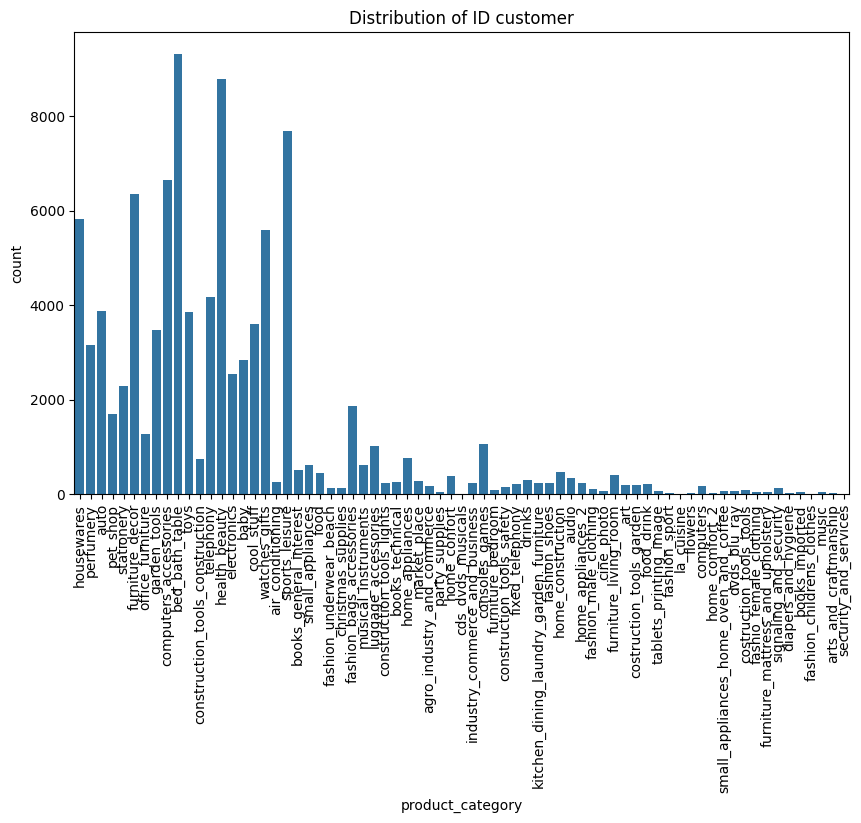

In [63]:
plt.figure(figsize=(10, 6))
sns.countplot(x='product_category', data=df)
plt.title('Distribution of ID customer')
plt.xticks(rotation=90)
plt.show()

######seller_state

banyak null

In [64]:
print(df['seller_state'].value_counts())

seller_state
SP    69968
MG     7844
PR     7590
RJ     4311
SC     3615
RS     1976
DF      819
BA      568
GO      463
PE      406
MA      391
ES      315
MT      135
CE       89
RN       51
MS       47
PB       34
RO       13
PI       12
PA        8
SE        7
AM        3
AC        1
Name: count, dtype: int64


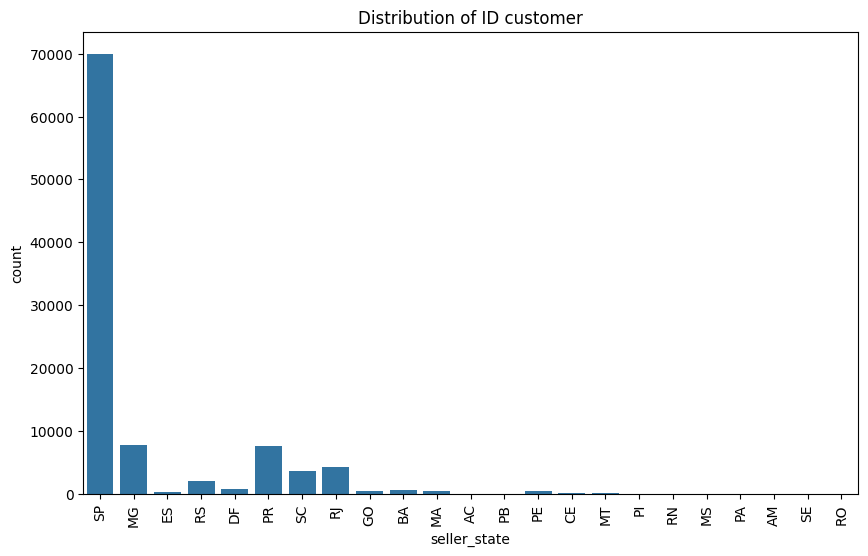

In [65]:
plt.figure(figsize=(10, 6))
sns.countplot(x='seller_state', data=df)
plt.title('Distribution of ID customer')
plt.xticks(rotation=90)
plt.show()

######review_score

banyak null

In [66]:
print(df['review_score'].value_counts())

review_score
5.000000    56955
4.000000    19018
1.000000    11316
3.000000     8136
2.000000     3125
4.500000       54
2.500000       34
3.500000       25
1.500000        8
3.333333        1
4.333333        1
Name: count, dtype: int64


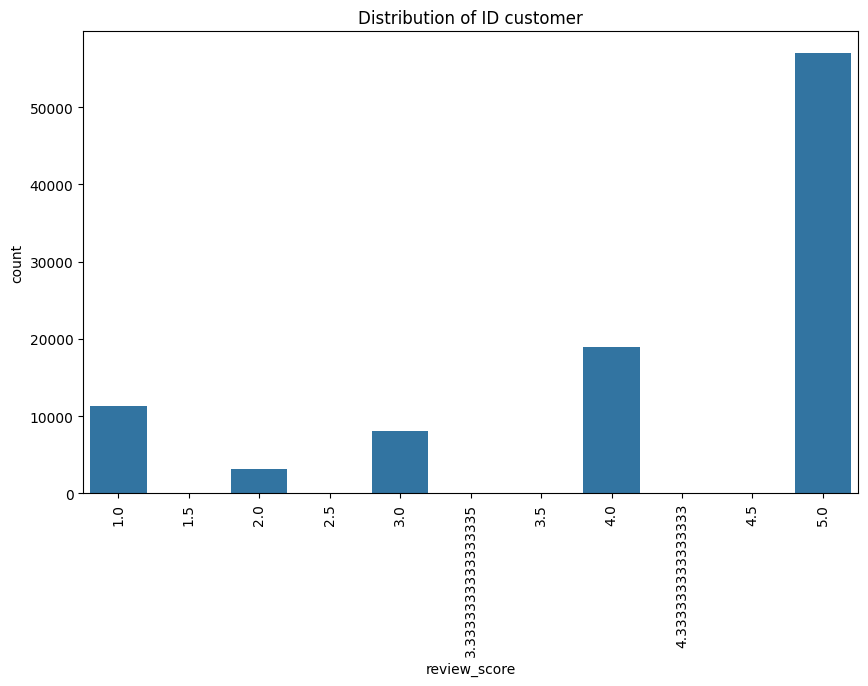

In [67]:
plt.figure(figsize=(10, 6))
sns.countplot(x='review_score', data=df)
plt.title('Distribution of ID customer')
plt.xticks(rotation=90)
plt.show()

####Data Cleaning

######Mengubah tipe data dari objek menjadi datetime
- **Action:** Kolom seperti `order_purchase_timestamp`, `order_approved_at`, `order_delivered_customer_date`, `order_delivered_carrier_date`, dan `order_estimated_delivery_date` diubah menjadi tipe data datetime.

In [68]:
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'], errors='coerce')
df['order_approved_at'] = pd.to_datetime(df['order_approved_at'], errors='coerce')
df['order_delivered_carrier_date'] = pd.to_datetime(df['order_delivered_carrier_date'], errors='coerce')
df['order_delivered_customer_date'] = pd.to_datetime(df['order_delivered_customer_date'], errors='coerce')
df['order_estimated_delivery_date'] = pd.to_datetime(df['order_estimated_delivery_date'], errors='coerce')

print(df[['order_purchase_timestamp',
          'order_approved_at',
          'order_delivered_carrier_date',
          'order_delivered_customer_date',
          'order_estimated_delivery_date']].dtypes)

order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
dtype: object


######Missing Value column datetime

In [69]:
cols_to_check = [
    'order_approved_at',
    'order_delivered_carrier_date',
    'order_delivered_customer_date',
    'total_payment',
    'payment_installments',
    'payment_type',
    'total_price',
    'total_freight',
    'num_products',
    'product_category',
    'seller_state',
    'review_score'
]

# Filter baris yang memiliki minimal satu missing value
null_rows = df[df[cols_to_check].isnull().any(axis=1)]

# Pilih kolom relevan untuk analisis dan identitas order
null_rows = null_rows[cols_to_check + ['order_id', 'customer_id']]

# Sort agar mudah dianalisis
null_rows = null_rows.sort_values(by='order_id')

# Tampilkan hasil
print("Baris dengan Missing Value di Olist:")
print(null_rows)

Baris dengan Missing Value di Olist:
        order_approved_at order_delivered_carrier_date  \
35138 2017-10-24 03:25:32                          NaT   
36265 2017-10-16 16:07:52          2017-10-16 23:04:43   
44054 2018-03-21 13:15:27          2018-03-22 00:13:35   
85228 2018-08-15 15:04:25                          NaT   
77415 2017-07-19 03:45:26          2017-07-19 17:07:11   
...                   ...                          ...   
73291 2018-08-17 03:29:42          2018-08-17 11:56:00   
95406 2017-05-19 18:30:27                          NaT   
40171 2017-07-21 02:50:44                          NaT   
21742 2018-02-18 15:35:35          2018-02-19 17:15:12   
49764 2017-10-17 04:15:00          2017-10-20 18:17:56   

      order_delivered_customer_date  total_payment  payment_installments  \
35138                           NaT         111.12                   1.0   
36265           2017-10-27 18:43:56         109.29                   1.0   
44054                           NaT   

In [73]:
def order_condition_clean(row):
    if row['order_status'] == 'canceled':
        return 'canceled'
    elif row['order_status'] == 'created':
        return 'not_approved'
    elif row['order_status'] in ['approved', 'processing', 'invoiced']:
        return 'not_delivered'
    elif row['order_status'] == 'shipped':
        return 'shipped'
    elif row['order_status'] == 'delivered':
        if pd.isna(row['order_delivered_customer_date']):
            return 'not_delivered'
        else:
            return 'delivered'
    else:
        return 'unknown'

df['order_condition'] = df.apply(order_condition_clean, axis=1)

In [74]:
pd.crosstab(df['order_status'], df['order_condition'])

order_condition,canceled,delivered,not_approved,not_delivered,shipped,unknown
order_status,,,,,,
approved,0,0,0,2,0,0
canceled,625,0,0,0,0,0
created,0,0,5,0,0,0
delivered,0,96470,0,8,0,0
invoiced,0,0,0,314,0,0
processing,0,0,0,301,0,0
shipped,0,0,0,0,1107,0
unavailable,0,0,0,0,0,609


######Missing Value Review

Kemungkinan customer belum memberi penilaian atau belum sampe

**Treatment:** bisa bikin kategori baru misal no_review

In [80]:
df['review_score'] = df['review_score'].fillna('no_review')

In [81]:
df.review_score.head(30)

,review_score
0,4.0
1,4.0
2,5.0
3,5.0
4,5.0
5,4.0
6,2.0
7,5.0
8,1.0
9,5.0


######Clean - Total Payment dan Installment

Hanya ada 1 baris

**Treatment:** Menghapus baris untuk menghindari asumsi tambahan seperti mengisi dengan median atau mode yang sebenarnya tidak diperlukan.

In [83]:
df = df.dropna(subset=['total_payment', 'payment_installments'])

######Missing Value - Payment_Type

**Treatment:** Isi missing value dengan nilai paling sering muncul

In [84]:
df['payment_type'] = df['payment_type'].fillna(df['payment_type'].mode()[0])

/tmp/ipython-input-3784138868.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['payment_type'] = df['payment_type'].fillna(df['payment_type'].mode()[0])


######Missing Value - total_price, total_freight, and num_products

**Treatment:** Hanya isi null untuk delivered, sisanya biarkan

In [88]:
mask_delivered = df['order_status'] == 'delivered'
df.loc[mask_delivered, ['total_price', 'total_freight', 'num_products']] = \
    df.loc[mask_delivered, ['total_price', 'total_freight', 'num_products']].fillna(0)

######Missing Value - Category

**Treatment:** bisa bikin kategori baru misal no_review

In [90]:
df['product_category'] = df['product_category'].fillna('no_category')

/tmp/ipython-input-4273807867.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['product_category'] = df['product_category'].fillna('no_category')


######Missing Value - seller_state

**Treatment:** bisa bikin kategori dengan "unknown"

In [91]:
df['seller_state'] = df['seller_state'].fillna('unknown')

/tmp/ipython-input-3448051475.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['seller_state'] = df['seller_state'].fillna('unknown')


In [93]:
df.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,160
order_delivered_carrier_date,1783
order_delivered_customer_date,2965
order_estimated_delivery_date,0
review_score,0
total_payment,0


Catatan:

Null di kolom tanggal (`order_approved_at`, `order_delivered_carrier_date`, `order_delivered_customer_date`) tidak dihapus, karena tetap merepresentasikan kondisi bisnis (belum di-approve, belum dikirim, atau tidak sampai).

Null pada kolom transaksi (`total_price`, `total_freight`, `num_products`) tetap dipertahankan untuk order yang tidak relevan (canceled / tidak ada item), agar analisis tetap konsisten dengan kondisi nyata.

Kolom baru order_condition menyatukan informasi missing value dari kolom tanggal dan order_status, sehingga analisis bisnis bisa langsung melihat status riil setiap order.

payment_type
credit_card    75387
boleto         19784
voucher         2739
debit_card      1527
not_defined        3
Name: count, dtype: int64

####Data Cleaning Completed!

## Exploratory Data Analysis (EDA)

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99440 entries, 0 to 99440
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99440 non-null  object        
 1   customer_id                    99440 non-null  object        
 2   order_status                   99440 non-null  object        
 3   order_purchase_timestamp       99440 non-null  datetime64[ns]
 4   order_approved_at              99280 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97657 non-null  datetime64[ns]
 6   order_delivered_customer_date  96475 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99440 non-null  datetime64[ns]
 8   review_score                   99440 non-null  object        
 9   total_payment                  99440 non-null  float64       
 10  payment_installments           99440 non-null  float64       
 11  payment_type        

####Encoding Kategorikal

In [96]:
df_encoded = df.copy()

categorical_cols = [
    'order_condition',
    'payment_type',
    'product_category',
    'seller_state',
    'customer_state'
]

for col in categorical_cols:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))

In [97]:
# Cek hasil encoding
df_encoded[categorical_cols].head()

,order_condition,payment_type,product_category,seller_state,customer_state
0,1,1,49,22,25
1,1,0,60,22,4
2,1,1,5,22,8
3,1,1,61,8,19
4,1,1,67,22,25
5,1,1,5,22,17
6,3,1,57,22,22
7,1,1,5,22,18
8,1,0,39,22,22
9,1,4,58,22,25


In [100]:
df.head(30)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_score,total_payment,...,payment_type,total_price,total_freight,num_products,product_category,seller_state,customer_state,customer_city,order_condition,order_condition_encoded
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,4.0,38.71,...,credit_card,29.99,8.72,1.0,housewares,SP,SP,sao paulo,delivered,1
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,4.0,141.46,...,boleto,118.70,22.76,1.0,perfumery,SP,BA,barreiras,delivered,1
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,5.0,179.12,...,credit_card,159.90,19.22,1.0,auto,SP,GO,vianopolis,delivered,1
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,5.0,72.20,...,credit_card,45.00,27.20,1.0,pet_shop,MG,RN,sao goncalo do amarante,delivered,1
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,5.0,28.62,...,credit_card,19.90,8.72,1.0,stationery,SP,SP,santo andre,delivered,1
5,a4591c265e18cb1dcee52889e2d8acc3,503740e9ca751ccdda7ba28e9ab8f608,delivered,2017-07-09 21:57:05,2017-07-09 22:10:13,2017-07-11 14:58:04,2017-07-26 10:57:55,2017-08-01,4.0,175.26,...,credit_card,147.90,27.36,1.0,auto,SP,PR,congonhinhas,delivered,1
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaT,NaT,2017-05-09,2.0,65.95,...,credit_card,49.90,16.05,1.0,no_category,SP,RS,santa rosa,not_delivered,3
7,6514b8ad8028c9f2cc2374ded245783f,9bdf08b4b3b52b5526ff42d37d47f222,delivered,2017-05-16 13:10:30,2017-05-16 13:22:11,2017-05-22 10:07:46,2017-05-26 12:55:51,2017-06-07,5.0,75.16,...,credit_card,59.99,15.17,1.0,auto,SP,RJ,nilopolis,delivered,1
8,76c6e866289321a7c93b82b54852dc33,f54a9f0e6b351c431402b8461ea51999,delivered,2017-01-23 18:29:09,2017-01-25 02:50:47,2017-01-26 14:16:31,2017-02-02 14:08:10,2017-03-06,1.0,35.95,...,boleto,19.90,16.05,1.0,furniture_decor,SP,RS,faxinalzinho,delivered,1
9,e69bfb5eb88e0ed6a785585b27e16dbf,31ad1d1b63eb9962463f764d4e6e0c9d,delivered,2017-07-29 11:55:02,2017-07-29 12:05:32,2017-08-10 19:45:24,2017-08-16 17:14:30,2017-08-23,5.0,169.76,...,voucher,149.99,19.77,1.0,office_furniture,SP,SP,sorocaba,delivered,1


###Korelasi Data

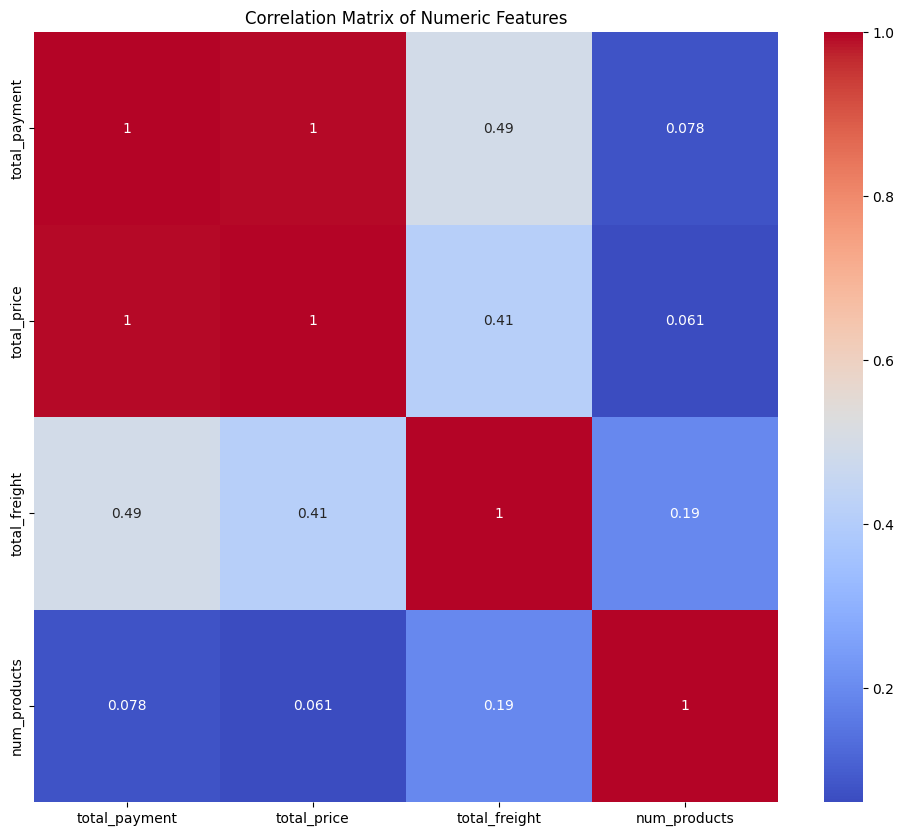

In [121]:
numeric_cols = ['total_payment', 'total_price', 'total_freight', 'num_products']

# Create a DataFrame containing only the numeric columns
df_numeric = df[numeric_cols]

# Check if the DataFrame is empty or all values are NaN
if df_numeric.empty or df_numeric.isnull().all().all():
    print("Error: No numeric data available or all numeric data is missing.")
else:
    # Calculate the correlation matrix
    correlation_matrix = df_numeric.corr()

    plt.figure(figsize=(12, 10))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
    plt.title('Correlation Matrix of Numeric Features')
    plt.show()

In [117]:
print(correlation_matrix)

               total_payment  total_price  total_freight  num_products
total_payment       1.000000     0.995970       0.492681      0.077784
total_price         0.995970     1.000000       0.412787      0.061311
total_freight       0.492681     0.412787       1.000000      0.194977
num_products        0.077784     0.061311       0.194977      1.000000


###Distribusi Data

In [101]:
categorical_feature = df.select_dtypes(include='object').columns.tolist()

numerical_feature = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
discrete_feature = [col for col in numerical_feature if len(df[col].unique()) < 25]
continuous_feature = [col for col in numerical_feature if col not in discrete_feature]

print(f'Number of Categorical Feature : {len(categorical_feature)}')
print(f'Number of Numerical Feature : {len(numerical_feature)}')
print(f'Number of Discrete Feature : {len(discrete_feature)}')
print(f'Number of Continuous Feature : {len(continuous_feature)}')

Number of Categorical Feature : 10
Number of Numerical Feature : 6
Number of Discrete Feature : 3
Number of Continuous Feature : 3


##Answer the question

####Pertanyaan 1: Produk mana yang paling laris dan memberikan revenue tertinggi? (Top ten)

#####Step 1 - hitung dulu jumlah penjualan per produknya

In [105]:
top_products_count = df[df['order_condition'] == 'delivered'].groupby('product_category')['order_id'].count().sort_values(ascending=False)
print(top_products_count.head(10))

product_category
bed_bath_table           9171
health_beauty            8607
sports_leisure           7492
computers_accessories    6501
furniture_decor          6213
housewares               5695
watches_gifts            5470
telephony                4076
auto                     3793
toys                     3779
Name: order_id, dtype: int64


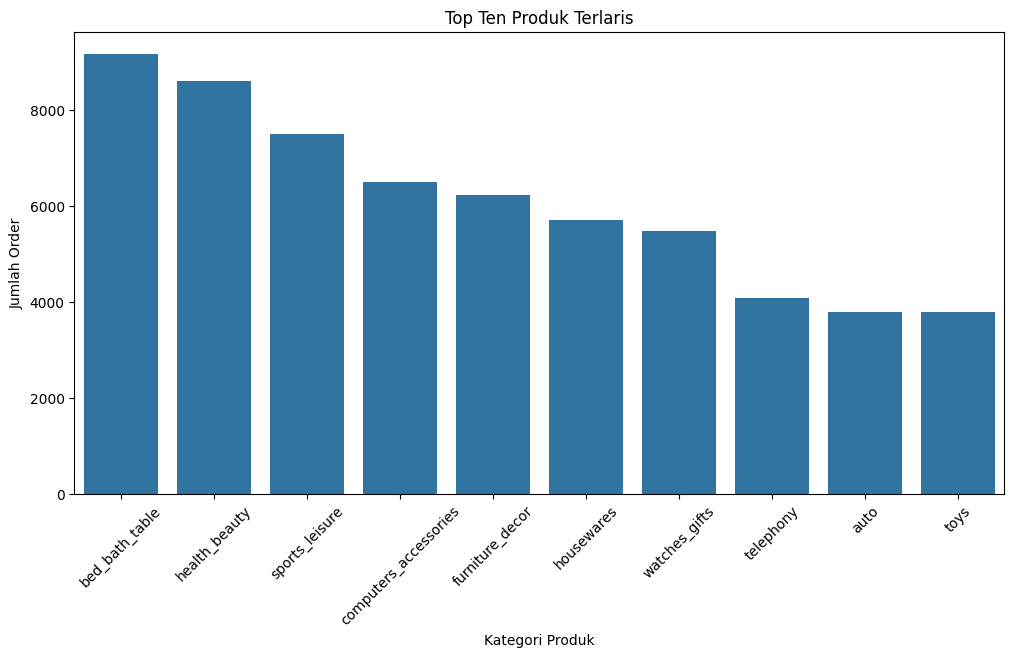

In [107]:
plt.figure(figsize=(12,6))
sns.barplot(x=top_products_count.index[:10], y=top_products_count.values[:10])
plt.xticks(rotation=45)
plt.title('Top Ten Produk Terlaris')
plt.ylabel('Jumlah Order')
plt.xlabel('Kategori Produk')
plt.show()

#####Step 2 - hitung total revenue per produk

In [106]:
top_products_revenue = df[df['order_condition'] == 'delivered'].groupby('product_category')['total_payment'].sum().sort_values(ascending=False)
print(top_products_revenue.head(10))

product_category
health_beauty            1410846.79
watches_gifts            1261634.89
bed_bath_table           1225127.59
sports_leisure           1119590.90
computers_accessories    1032599.02
furniture_decor           884202.65
housewares                761444.74
cool_stuff                693332.23
auto                      669414.65
garden_tools              567606.19
Name: total_payment, dtype: float64


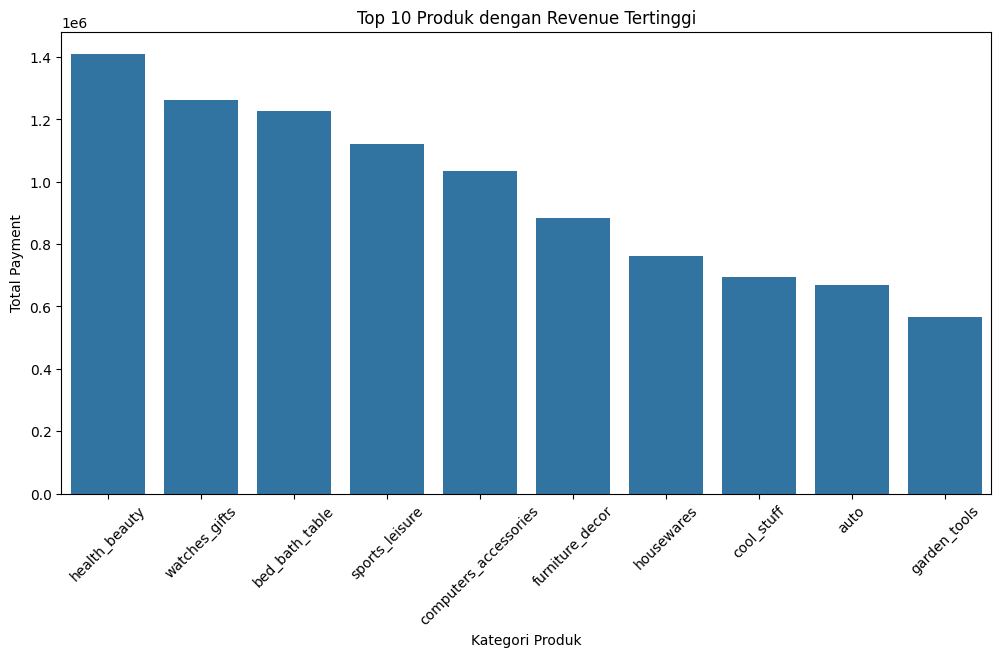

In [108]:
plt.figure(figsize=(12,6))
sns.barplot(x=top_products_revenue.index[:10], y=top_products_revenue.values[:10])
plt.xticks(rotation=45)
plt.title('Top 10 Produk dengan Revenue Tertinggi')
plt.ylabel('Total Payment')
plt.xlabel('Kategori Produk')
plt.show()

Terlihat bahwasannya Produk paling laris belum tentu memberikan revenue tertinggi.

####Pertanyaan 2: Bagaimana keterlambatan pengiriman mempengaruhi kepuasan pelanggan?

In [109]:
df['delivery_days'] = (df['order_delivered_customer_date'] - df['order_purchase_timestamp']).dt.days

df['is_late'] = df['order_delivered_customer_date'] > df['order_estimated_delivery_date']

delivered_orders = df[(df['order_condition'] == 'delivered') & (df['review_score'] != 'no_review')]

late_vs_review = delivered_orders.groupby('is_late')['review_score'].mean()

print(late_vs_review)

is_late
False    4.294292
True      2.56671
Name: review_score, dtype: object


Disini dapat terlihat bagaimana keterlambatan pengiriman memengaruhi penilaian pelanggan (review score).

`is_late`=True artinya pesanan datang lebih lambat dari tanggal perkiraan.

Jika kita hitung rata-rata review score untuk pesanan yang terlambat, biasanya lebih rendah dibanding yang tepat waktu. Itu artinya pelanggan kurang puas ketika pesanan telat.

`is_late`=False artinya pesanan datang tepat waktu atau lebih cepat.

Rata-rata review score di sini lebih tinggi, artinya pelanggan lebih puas ketika pesanan tiba sesuai estimasi.

/tmp/ipython-input-543580196.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=late_vs_review.index, y=late_vs_review.values, palette='pastel')


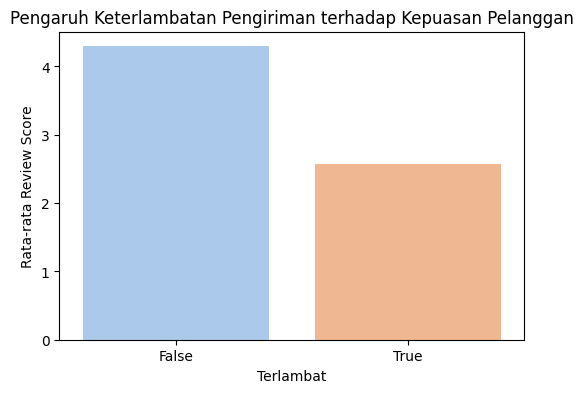

In [110]:
plt.figure(figsize=(6,4))
sns.barplot(x=late_vs_review.index, y=late_vs_review.values, palette='pastel')
plt.title('Pengaruh Keterlambatan Pengiriman terhadap Kepuasan Pelanggan')
plt.xlabel('Terlambat')
plt.ylabel('Rata-rata Review Score')
plt.show()

Untuk kondisi tersebut dapat disimpulkan bahwasannya lebih banyak customer yang merasa puas dengan kecepatan pengantaran yang sesuai dengan estimasi

####Pertanyaan 3: Metode pembayaran mana yang paling populer dan menghasilkan transaksi terbesar?

In [111]:
payment_counts = df['payment_type'].value_counts().reset_index()
payment_counts.columns = ['payment_type', 'num_transactions']

payment_revenue = df.groupby('payment_type')['total_payment'].sum().reset_index()

payment_summary = pd.merge(payment_counts, payment_revenue, on='payment_type')

print(payment_summary)

  payment_type  num_transactions  total_payment
0  credit_card             75387    12561997.58
1       boleto             19784     2869361.27
2      voucher              2739      359573.48
3   debit_card              1527      217939.79
4  not_defined                 3           0.00


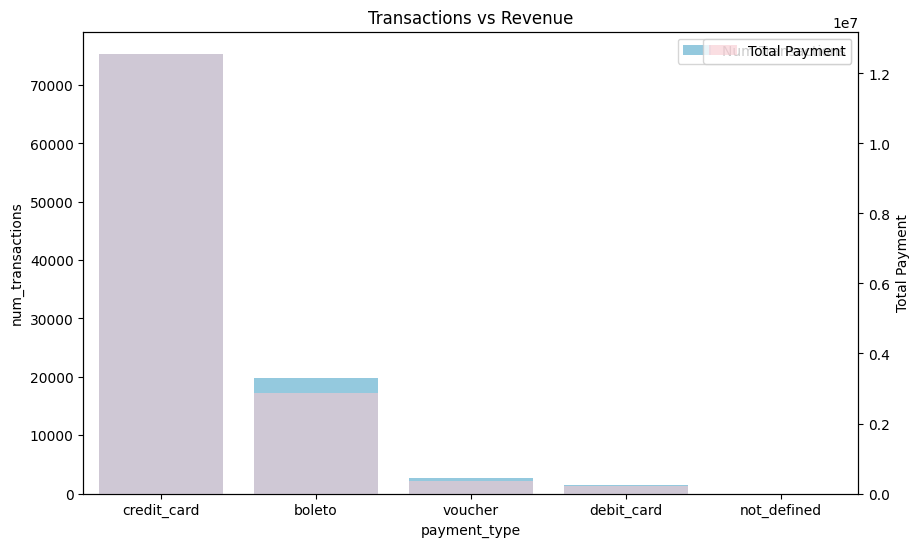

In [114]:
plt.figure(figsize=(10,6))

sns.barplot(x='payment_type', y='num_transactions', data=payment_summary, color='skyblue', label='Num Transactions')

ax2 = plt.twinx()
sns.barplot(x='payment_type', y='total_payment', data=payment_summary, color='pink', alpha=0.6, label='Total Payment', ax=ax2)

plt.title('Transactions vs Revenue')
plt.xlabel('Payment Type')
ax2.set_ylabel('Total Payment')
plt.show()

Dapat terlihat bahwa metode pembayaran yang paling populer adalah Credit Card, dengan jumlah transaksi terbanyak dan kontribusi revenue tertinggi. Sementara Boleto memiliki jumlah transaksi cukup banyak, tetapi kontribusi revenuenya lebih rendah dibanding Credit Card. Metode Voucher dan Debit Card hanya memberikan dampak kecil terhadap total transaksi dan revenue.

Hal ini menunjukkan bahwa strategi promosi atau insentif bisa difokuskan pada penggunaan Credit Card untuk mendorong penjualan dan meningkatkan pendapatan.

####Pertanyaan 4: Seller mana yang paling cepat mengirim dan paling banyak ordernya?

In [116]:
df['delivery_days'] = (df['order_delivered_customer_date'] - df['order_purchase_timestamp']).dt.days

delivered_orders = df[df['order_condition'] == 'delivered']

seller_stats = delivered_orders.groupby('seller_state').agg({
    'delivery_days': 'mean',
    'order_id': 'count'
}).rename(columns={'delivery_days': 'avg_delivery_days', 'order_id': 'num_orders'}).reset_index()

fastest_sellers = seller_stats.sort_values('avg_delivery_days').head(5)

#diurutkan
top_sellers = seller_stats.sort_values('num_orders', ascending=False).head(5)

print("Seller dengan pengiriman tercepat:")
print(fastest_sellers)
print("\nSeller dengan jumlah order terbanyak:")
print(top_sellers)


Seller dengan pengiriman tercepat:
   seller_state  avg_delivery_days  num_orders
18           RS          11.063109        1949
15           RJ          11.638949        4185
21           SP          11.897829       68415
8            MS          11.936170          47
3            DF          12.013699         803

Seller dengan jumlah order terbanyak:
   seller_state  avg_delivery_days  num_orders
21           SP          11.897829       68415
7            MG          12.409572        7647
14           PR          12.969305        7428
15           RJ          11.638949        4185
19           SC          13.280484        3551


Berdasarkan data:

Seller dengan pengiriman tercepat: RS, RJ, SP, MS, dan DF memiliki rata-rata waktu pengiriman antara 11–12 hari. RS tercepat dengan 11,06 hari, walaupun jumlah order-nya relatif lebih sedikit dibandingkan SP.

Seller dengan jumlah order terbanyak: SP, MG, PR, RJ, dan SC, dengan SP paling banyak (68.415 order). Namun, rata-rata delivery-nya sedikit lebih tinggi (11,9 hari) dibanding RS.

####Pertanyaan 5: Apakah jumlah produk dalam satu order memengaruhi total pembayaran atau total harga?

#####Step 1 - melihat korelasi kembali

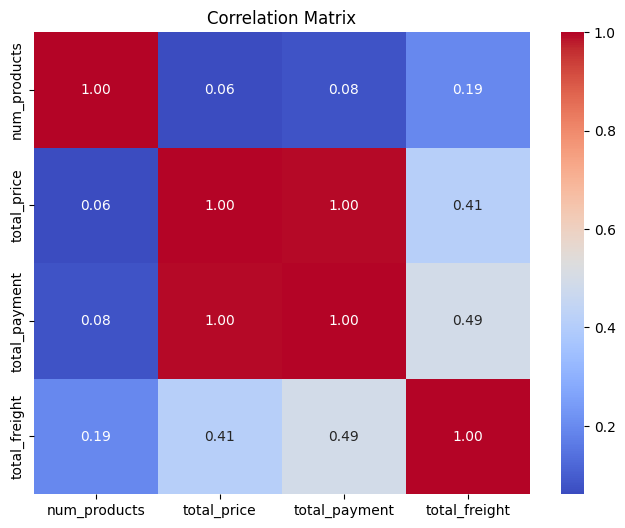

In [124]:
cols = ['num_products', 'total_price', 'total_payment', 'total_freight']
subset = df[cols]

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

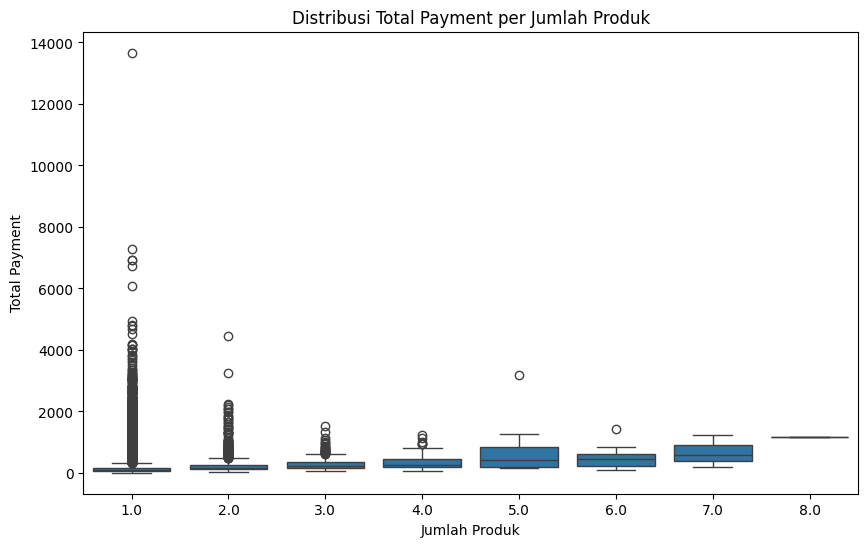

In [126]:
plt.figure(figsize=(10,6))
sns.boxplot(x='num_products', y='total_payment', data=df)
plt.title("Distribusi Total Payment per Jumlah Produk")
plt.xlabel("Jumlah Produk")
plt.ylabel("Total Payment")
plt.show()

Dapat terlihat bahwa mayoritas customer hanya membeli 1-2 barang dengan harga murah, namun keuntungan besar justru datang dari segelintir customer yang membeli 1 barang mewah (harga sangat mahal).